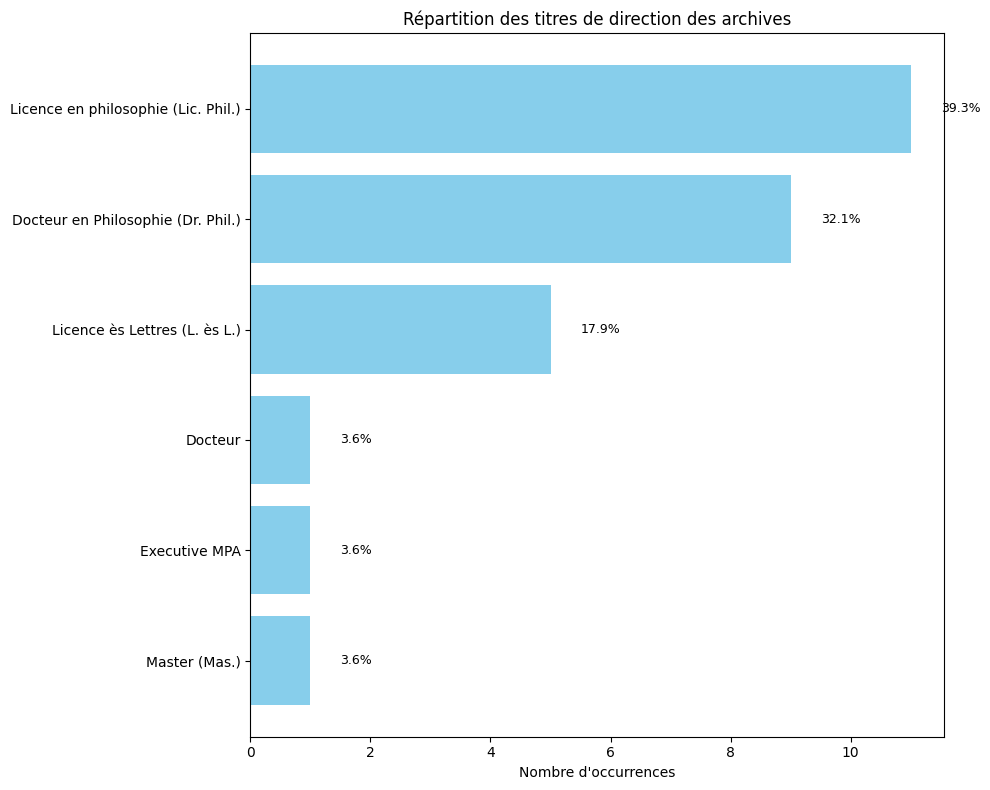

In [1]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# 2. Charger le fichier Excel
df = pd.read_excel("Titre_direction_archives.xlsx")  # Mets ici le chemin relatif si besoin
df.columns = df.columns.str.strip()  # Nettoyer les noms de colonnes

# 3. Calculer la fréquence des titres
titre_counts = df["Titre"].value_counts().sort_values(ascending=True)
titre_percentages = (titre_counts / titre_counts.sum()) * 100

# 4. Créer le barplot horizontal
plt.figure(figsize=(10, 8))
bars = plt.barh(titre_counts.index, titre_counts, color='skyblue')

# 5. Annoter avec les pourcentages
for bar, pct in zip(bars, titre_percentages):
    plt.text(bar.get_width() + 0.5, bar.get_y() + bar.get_height() / 2,
             f"{pct:.1f}%", va='center', fontsize=9)

# 6. Ajouter les labels et le titre
plt.xlabel("Nombre d'occurrences")
plt.title("Répartition des titres de direction des archives")
plt.tight_layout()

# 7. Afficher le graphique
plt.show()


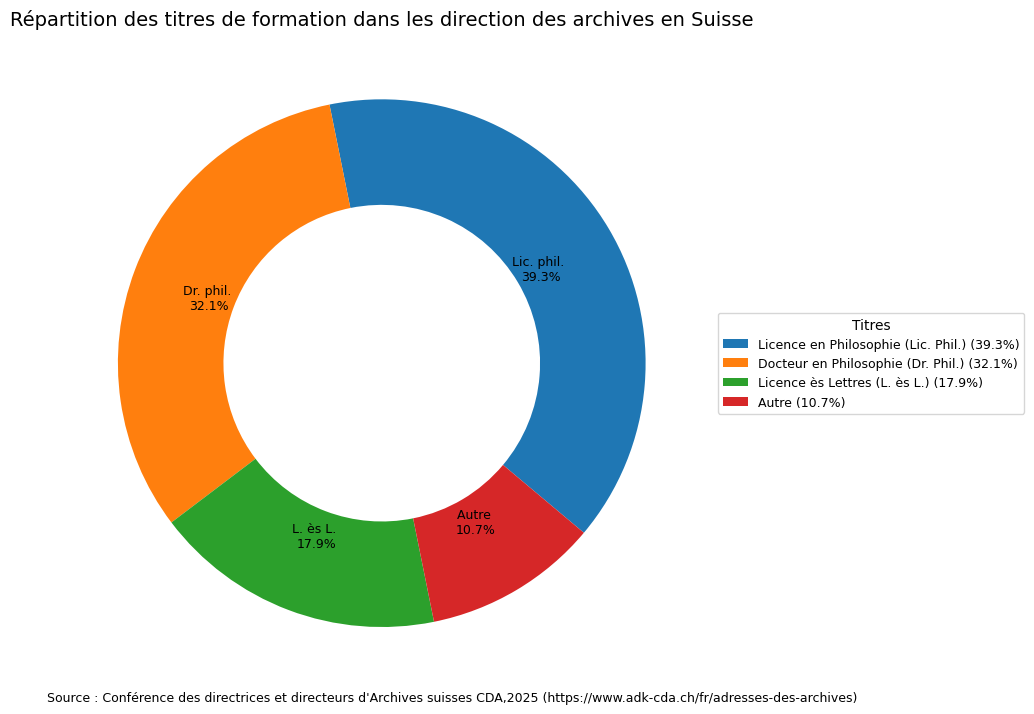

In [12]:
# 1. Importer les bibliothèques nécessaires
import pandas as pd
import matplotlib.pyplot as plt

# 2. Charger le fichier
df = pd.read_excel("Titre_direction_archives.xlsx")
df.columns = df.columns.str.strip()

# 3. Préparer les données
titre_counts = df["Titre"].value_counts()
titre_percentages = (titre_counts / titre_counts.sum()) * 100

# Associer chaque titre à une abréviation unique (en gardant la plus fréquente)
abbr_map = df.groupby("Titre")["abréviation"].agg(lambda x: x.mode().iloc[0] if not x.mode().empty else x.iloc[0])

# 4. Préparer les labels internes : Abréviation + pourcentage
labels = titre_counts.index
sizes = titre_counts.values
internal_labels = [f"{abbr_map[t]} \n{titre_percentages[t]:.1f}%" for t in labels]

# 5. Création du donut chart
fig, ax = plt.subplots(figsize=(10, 10))
wedges, texts = ax.pie(
    sizes,
    wedgeprops=dict(width=0.4),
    startangle=-40,
    labels=internal_labels,
    labeldistance=0.7,
    textprops=dict(size=9, ha='center', va='center')
)

# 6. Légende externe (titre complet + pourcentage)
legend_labels = [f"{label} ({titre_percentages[label]:.1f}%)" for label in labels]
ax.legend(wedges, legend_labels, title="Titres", loc="center left", bbox_to_anchor=(1, 0.5), fontsize=9)

# 7. Titre et source
plt.title("Répartition des titres de formation dans les direction des archives en Suisse", fontsize=14)

# ✅ Source légèrement rapprochée du graphique
plt.figtext(0.01, 0.15, "Source : Conférence des directrices et directeurs d'Archives suisses CDA,2025 (https://www.adk-cda.ch/fr/adresses-des-archives)", ha="left", fontsize=9)

# 8. Affichage
plt.tight_layout()
plt.show()
